In [2]:
from utils import *
from filters import *
from analysis import *
from plots import *

In [4]:
from scipy.signal import chirp, spectrogram

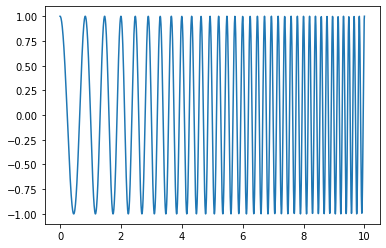

In [8]:
# chirp
t = np.linspace(0, 10, 1500)
w = chirp(t, f0=1, f1=6, t1=10, method='linear')
plt.plot(t, w)
plt.show()

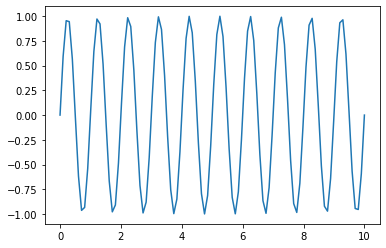

In [14]:
# x[n] = A * sin(2 π * f * n * Td)
td = 10
t0 = 0
t1 = 10
A = 1
f = 1
n = np.linspace(t0,t1, td*(t1-t0))
x = A * sin(2*pi*f*n)
plt.plot(n,x)
plt.show()


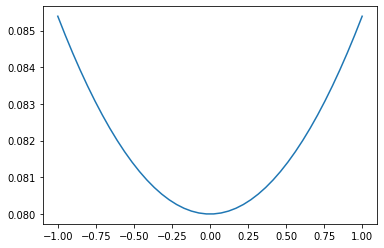

In [91]:
td = 21
t0 = -1
t1 = 1
A = 1
f = 1
n = np.linspace(t0,t1, td*(t1-t0))
N = len(n)
#N = 3
x = 0.54 - 0.46 * cos(  (2*pi*n) / (N-1) )
plt.plot(n,x)
plt.show()

Text(0.5, 0, 'Normalized frequency [cycles per sample]')

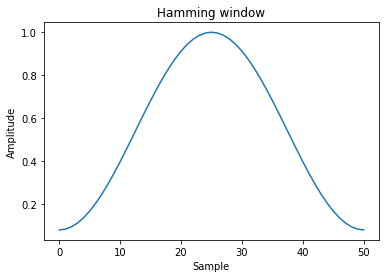

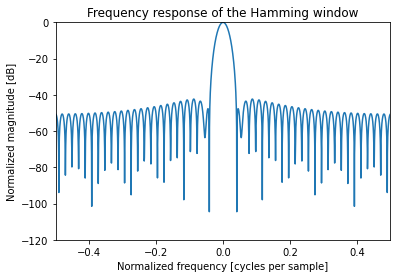

In [68]:
from scipy.fft import fft, fftshift
window = signal.windows.hamming(51)
plt.plot(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of the Hamming window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

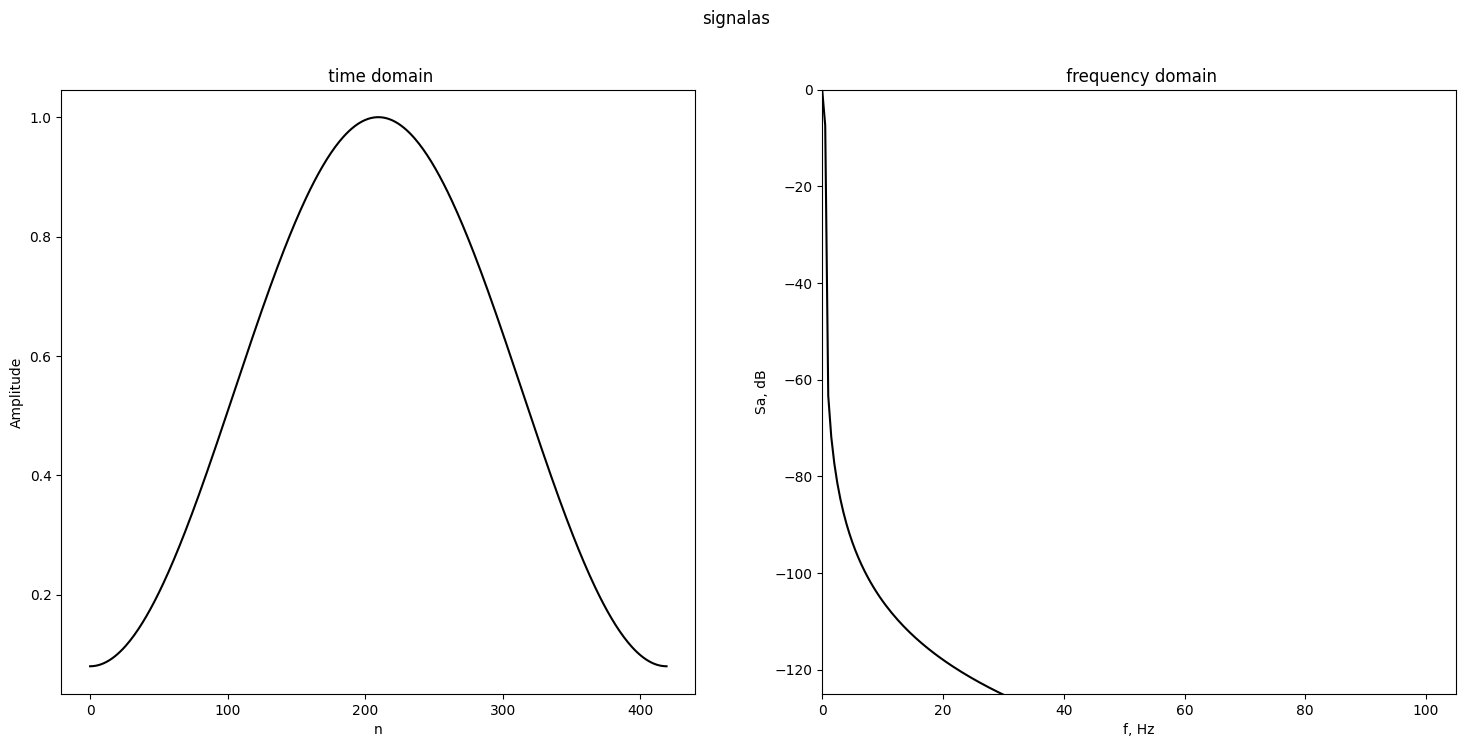

In [62]:
plot_signal(x,td,start_delay=0,title="signalas",filename=None)

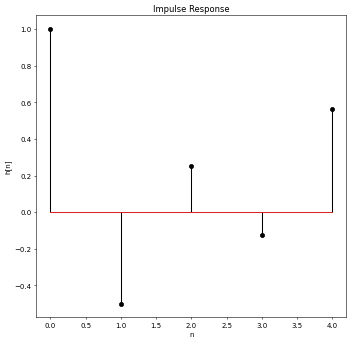

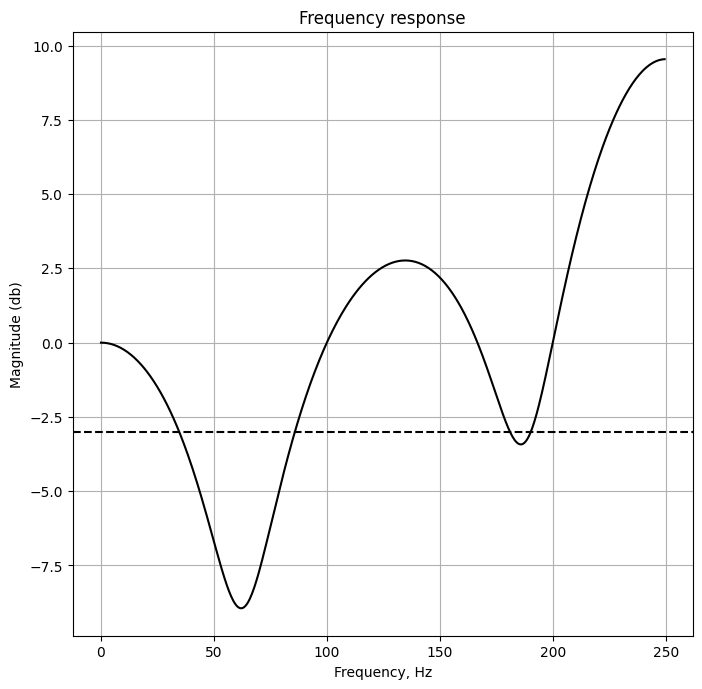

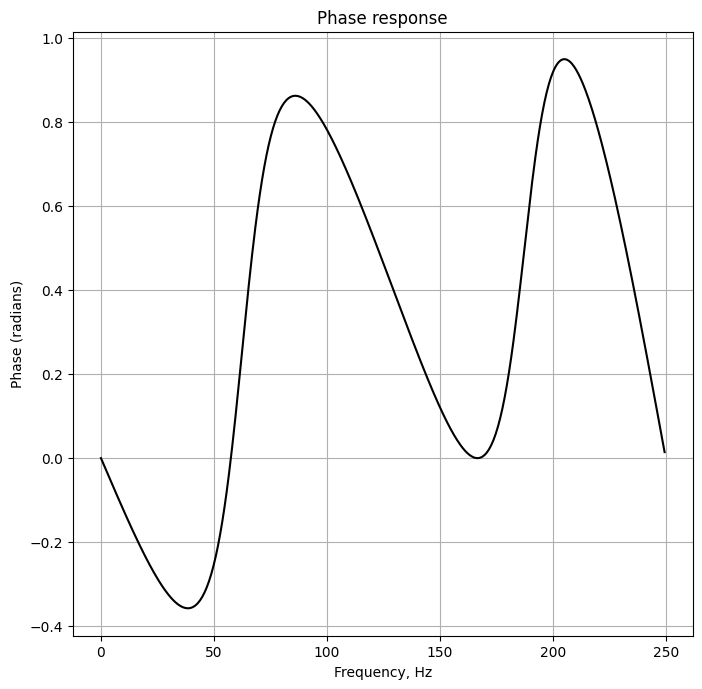

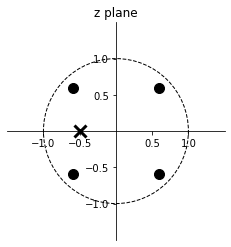

In [70]:
b = [1,0,0,0,0.5]
a = [1,0.5]
fd = 500

analyze_filter(b,a,fd,analysis_types=[1,2,3,4])

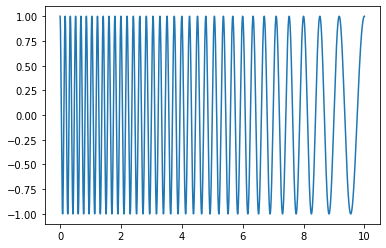

In [73]:
# RIR
#x,delay,b = fir(x,fd,transition_width,attenuation,cutoff)
# chirp
fd = 500
t0 = 0
t1 = 10
t = np.linspace(t0,t1, (t1-t0)*fd)
w = chirp(t, f0=6, f1=1, t1=10, method='linear')
plt.plot(t, w)
plt.show()


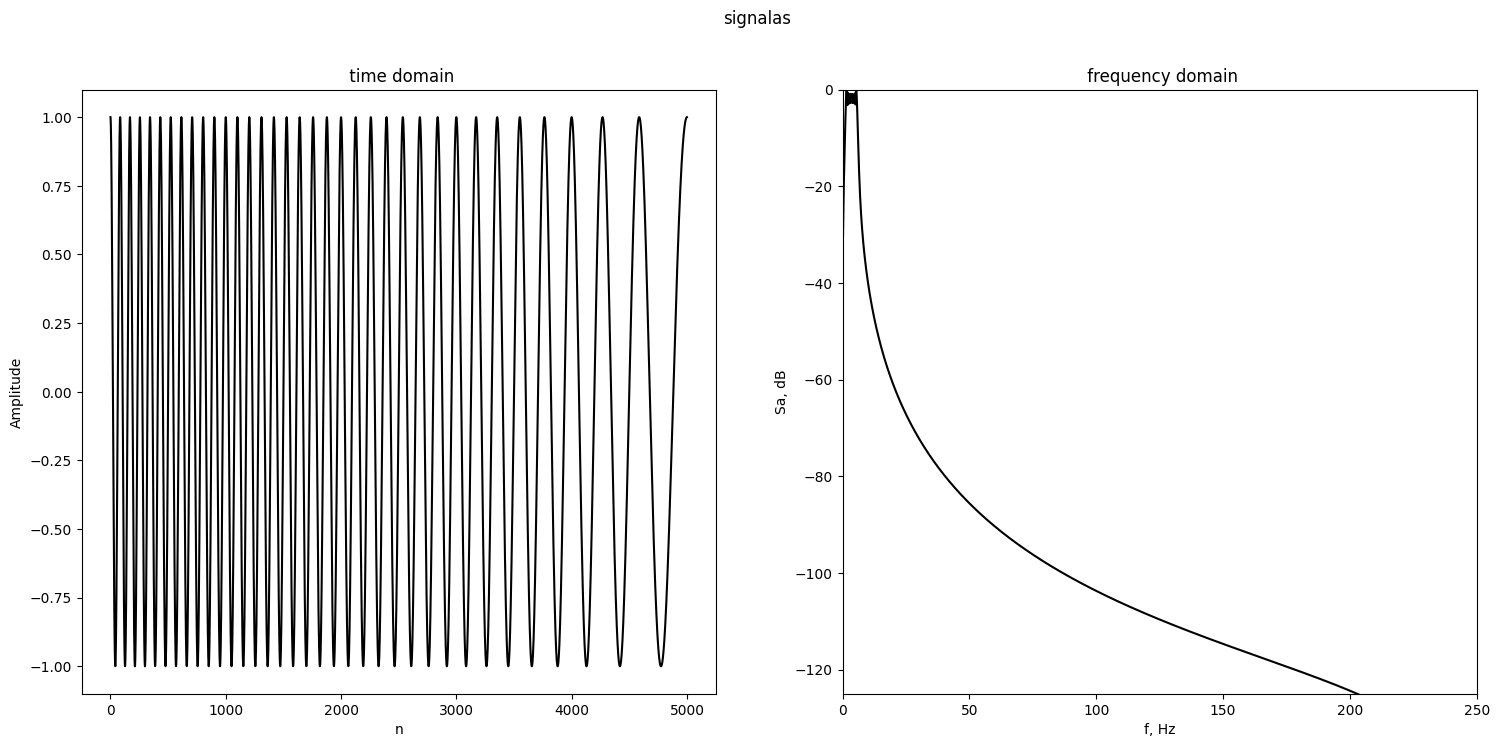

In [74]:
plot_signal(w,fd,start_delay=0,title="signalas",filename=None)

In [78]:
transition_width = 10
attenuation = 60
cutoff = 10
x1,delay,b = fir(w,fd,transition_width,attenuation,cutoff)

started a fir filter routine with:
n=5000 fd=500
transition_width: 10hz, attenuation: 60dB, cutoff: 10hz
delay: 91


In [84]:
#plot_signal(x1,fd,start_delay=0,title="signalas",filename=None)
#analyze_filter(b,[1],fd,analysis_types=[1,2,3,4])

In [87]:
taps_n = 18
cutoff = 10
taps = firwin(numtaps=taps_n, cutoff=cutoff,window="nuttall",fs=fd)

# Use lfilter to filter x with the FIR filter.
x1 = lfilter(taps, 1.0, w)

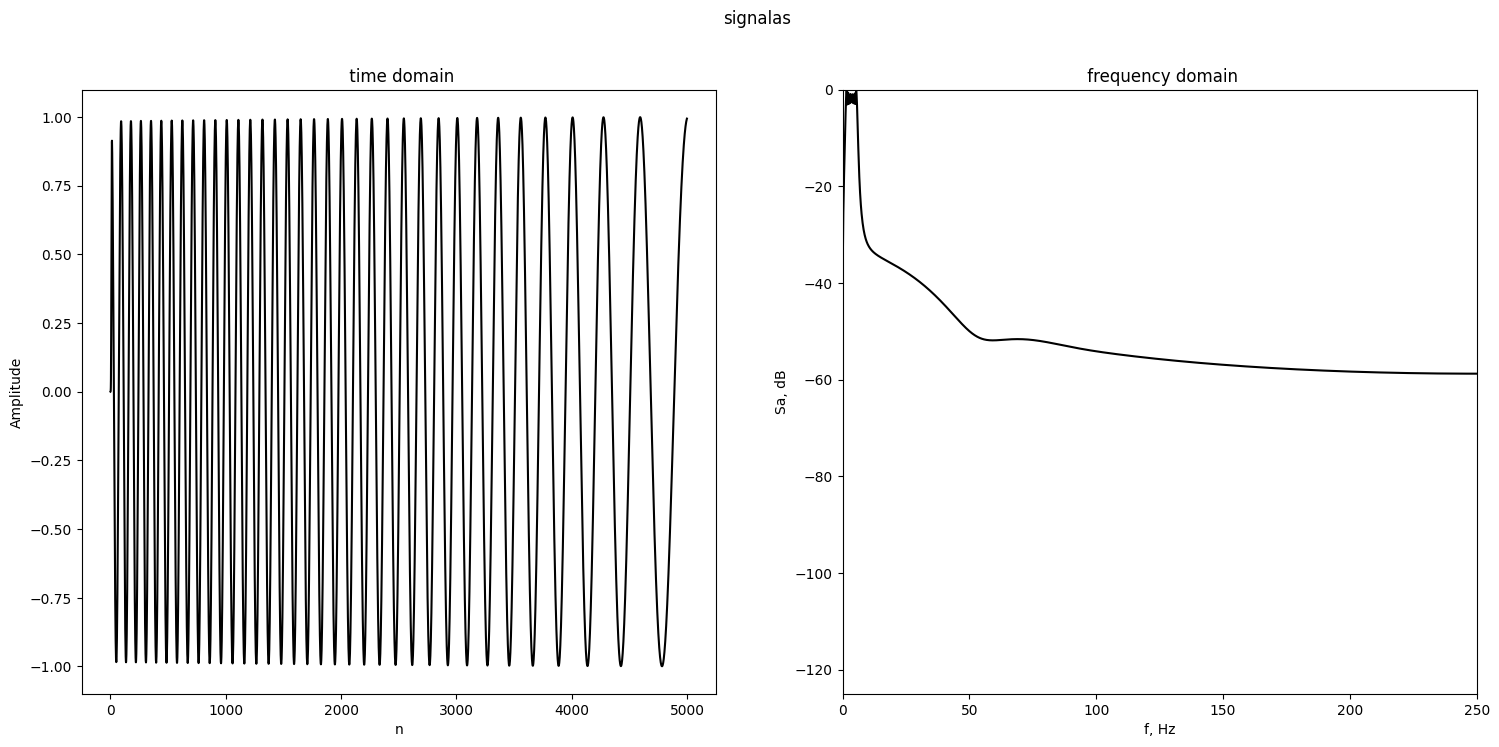

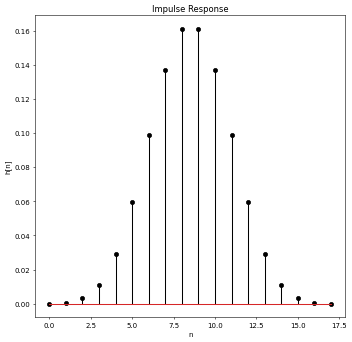

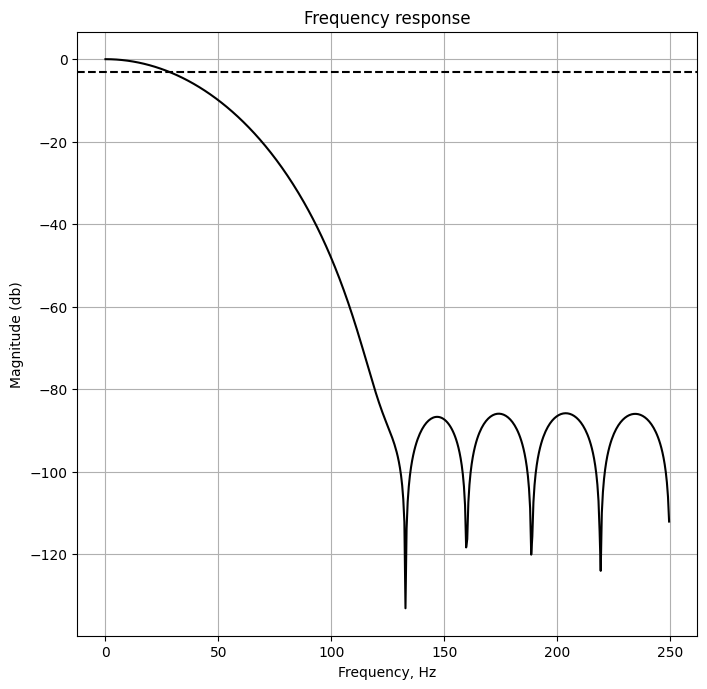

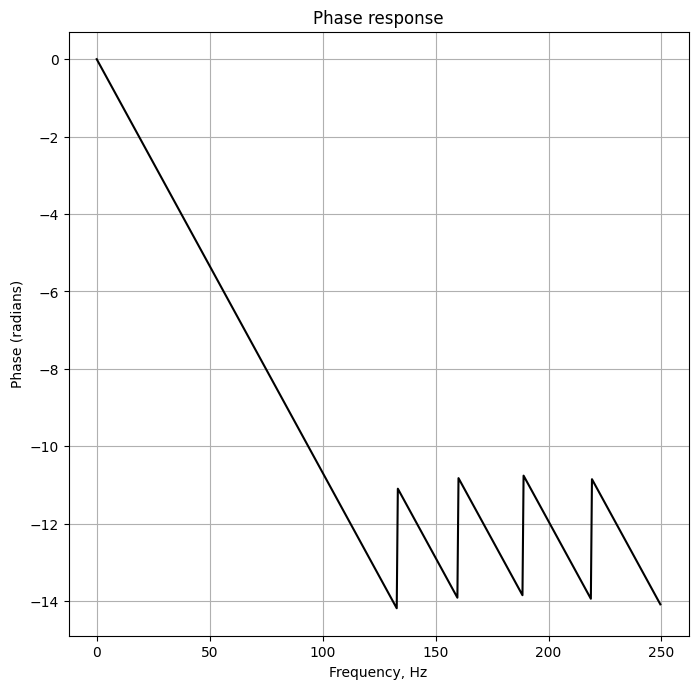

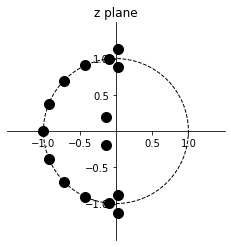

In [88]:
plot_signal(x1,fd,start_delay=0,title="signalas",filename=None)
analyze_filter(taps,[1],fd,analysis_types=[1,2,3,4])

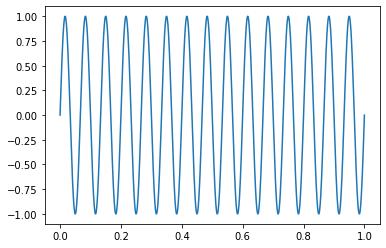

In [112]:
td = 1 / 0.001
t0 = 0
t1 = 1
A = 1
f = 1
n = np.linspace(t0,t1, td*(t1-t0))
x1 = sin(2*pi*15*n)
x2 = sin(2*pi*485*n) 
plt.plot(n,x1)
#plt.plot(n,x2)
#plt.plot(n,x1+x2)
plt.show()


#

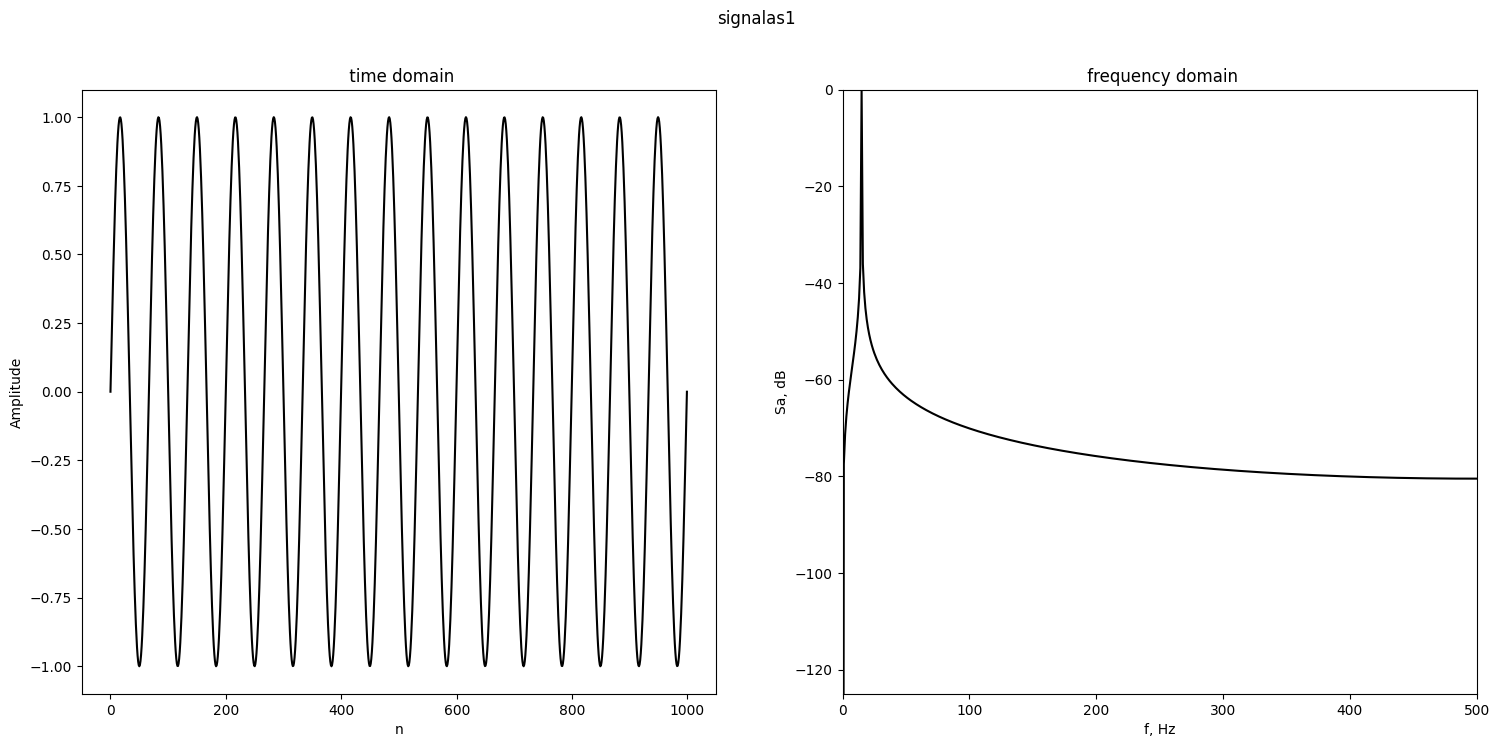

In [113]:
plot_signal(x1,td,start_delay=0,title="signalas1",filename=None)

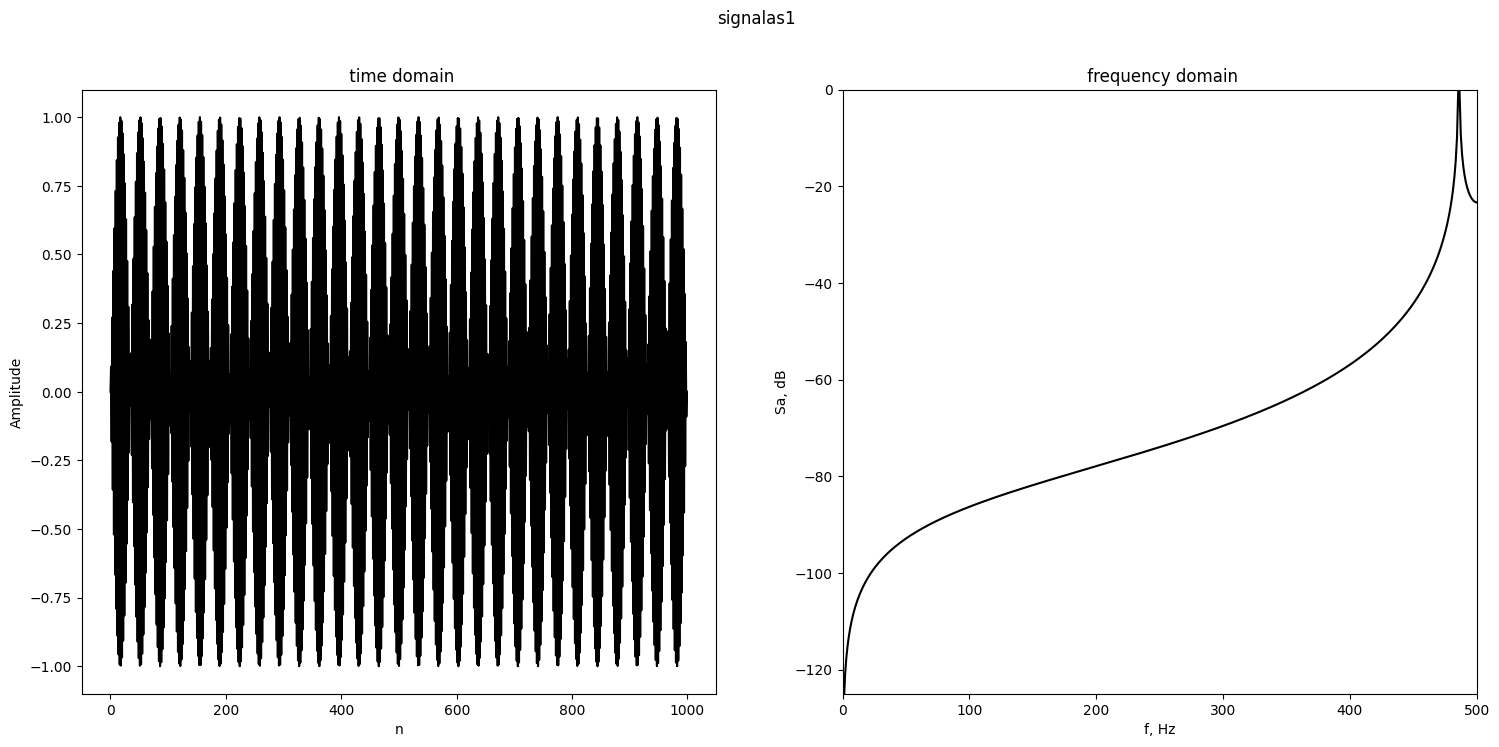

In [114]:
plot_signal(x2,td,start_delay=0,title="signalas1",filename=None)

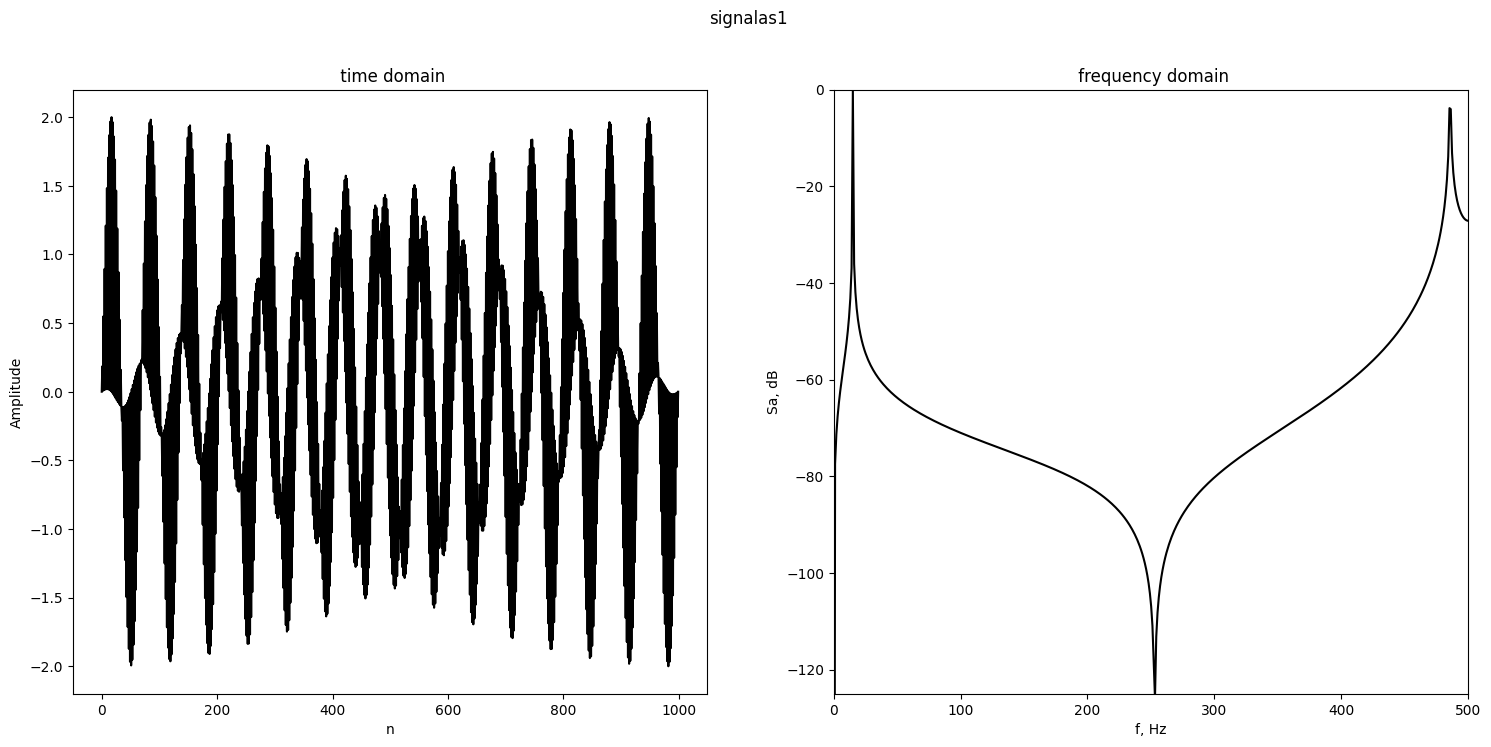

In [115]:
plot_signal(x1+x2,td,start_delay=0,title="signalas1",filename=None)

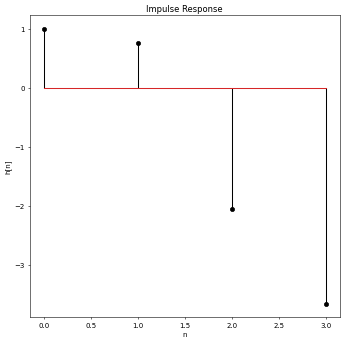

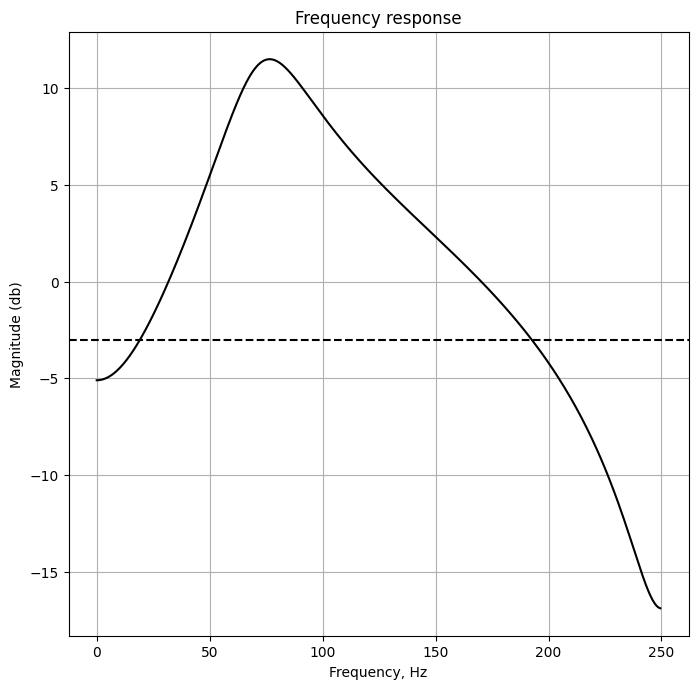

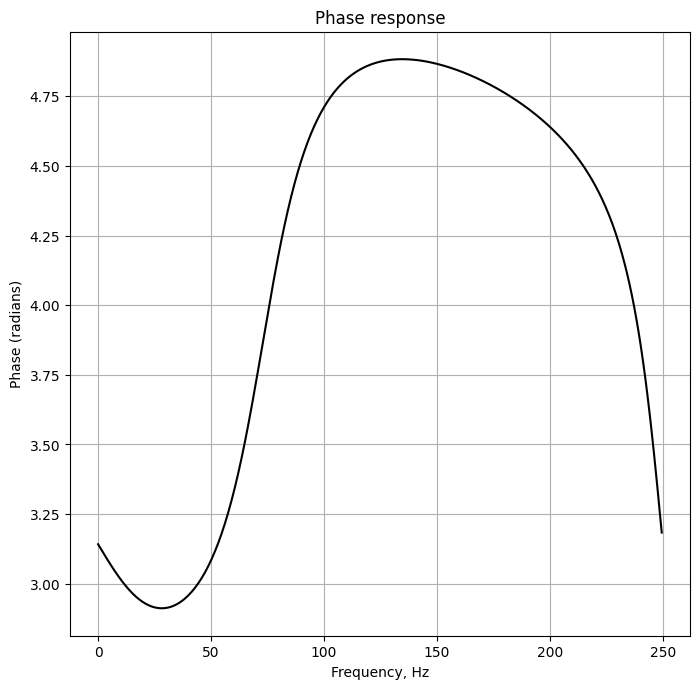

In [102]:
b = [1,-0.8,-1.6,0.8]
a = [1,-1.56,1.64]
fd = 500
analyze_filter(b,a,fd,analysis_types=[1,2,3])